<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kernel-Rigde-Regression" data-toc-modified-id="Kernel-Rigde-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kernel Rigde Regression</a></span></li></ul></div>

## Kernel Rigde Regression

Kernel Rigde Regression一般是没有偏置项的，例如sklearn的KernelRigde实现。无偏置的kernel ridge的loss为
$$
L = \sum_j \left(y_i - \sum_{0<i<\infty} \beta_i \phi_i(x_j)\right)^2 + \lambda \sum_{0<i<\infty}|\beta_i|^2
$$


具有偏置项的kernel rigde(kernel ridge regression with offset)的loss函数为
$$
L = \sum_j \left(y_i - \beta_0  -\sum_{0<i<\infty} \beta_i \phi_i(x_j)\right)^2 + \lambda \sum_{0<i<\infty}|\beta_i|^2
$$


具有偏置项的kernel ridge regression，需要在希尔伯特空间对向量进行中心化，这和线性拟合中ridge方法类似。

偏置项可以通过在到希尔伯特空间的映射中添加一个新的维度$\phi_0(x)=C$来添加进来,只要$C$足够大，那么L2惩罚就足够小。在sklearn中

* linear kernel没有常数项，$k(x,y) = x\cdot y$ 。
* 多项式核具有偏置项, $k(x,y) = (\gamma(x\cdot y) + c_0)^d$

因而如果要进行不惩罚偏置项的线性拟合，有四种方法

* 使用`sklearn.linear_model.Ridge`
* 使用`sklearn.kernel_ridge.KernelRidge(kernel="poly",degree=1, coef0=1E6)` 将`coef0`即($c_0$)设置的足够大，可以将正则化对偏置项的惩罚降到忽略不计。
* 使用`sklearn.kernel_ridge.KernelRidge`和自定义核，$k(x,y) = x\cdot y +C$，其中$C$足够大。
* 实现centered kernel ridge regression（稍微熟悉矩阵也不是太麻烦）

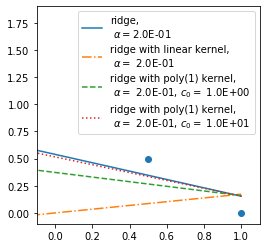

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
%matplotlib inline


X_train=np.array([[0.5], [1.0]])
y_train=np.array([0.5, 0])
X_plt=np.linspace(-1,1,10)

alpha=0.2
ridge = KernelRidge(kernel="poly", alpha=alpha, coef0=1E0, gamma=1, degree=1)
ridge.fit(X_train, y_train)
yhat = ridge.predict(X_plt.reshape(-1,1))

ridge = KernelRidge( kernel="linear", alpha=alpha, coef0=1E10)
ridge.fit(X_train, y_train)
yhat3 = ridge.predict(X_plt.reshape(-1,1))

ridge = KernelRidge(kernel="poly", alpha=alpha, coef0=1E1, gamma=1, degree=1)
ridge.fit(X_train, y_train)
yhat1 = ridge.predict(X_plt.reshape(-1,1))

ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)
yhat2 = ridge2.predict(X_plt.reshape(-1,1))

plt.figure(figsize=(4,4))
X_plt=np.linspace(-1,1,10)
plt.scatter(X_train, y_train)
plt.plot(X_plt, yhat2, label="ridge,\n" + r" $\alpha=$%.1E"%alpha)
plt.plot(X_plt, yhat3 , label="ridge with linear kernel,\n" + r" $\alpha=$ %.1E"%(alpha), linestyle="-.")
plt.plot(X_plt, yhat , label="ridge with poly(1) kernel,\n" + r" $\alpha=$ %.1E, $c_0 =$ %.1E"%(alpha, 1 ), linestyle="--")
plt.plot(X_plt, yhat1, label="ridge with poly(1) kernel,\n" + r" $\alpha=$ %.1E, $c_0 =$ %.1E"%(alpha, 10), linestyle=":")
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.9))
plt.legend()
plt.show()

因而如果要进行不惩罚偏置项的高斯核拟合，有两种方法

* 使用`sklearn.kernel_ridge.KernelRidge`和自定义核，$k(x,y) = \text{rbf} + C$，其中$C$足够大。
* 实现centered kernel ridge regression（稍微熟悉矩阵也不是太麻烦）


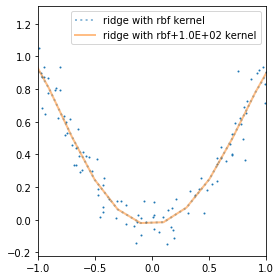

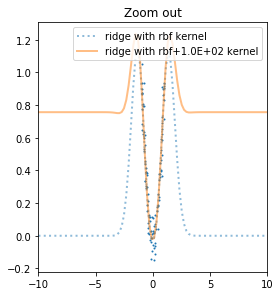

In [74]:
from sklearn.metrics.pairwise import rbf_kernel

X_train=np.random.rand(100,1)*2-1
y_train= 10*X_train[:,0]**2/(10 + X_train[:,0]**2) + 0.1*np.random.randn(100)
w=10
X_plt=np.linspace(-w,w, 100)

alpha=1E-2
ridge1 = KernelRidge(kernel="rbf", alpha=alpha, gamma=1)
ridge1.fit(X_train, y_train)
yhat1 = ridge1.predict(X_plt.reshape(-1,1))

def get_rbf_with_offset_kernel(C, gamma):
    def rbf_with_offset_kernel(X, Y):
        return rbf_kernel([X],[Y], gamma)[0,0] + C
    return rbf_with_offset_kernel
        

C=100
ridge2 = KernelRidge(kernel=get_rbf_with_offset_kernel(C, gamma=1), alpha=alpha)
ridge2.fit(X_train, y_train)
yhat2 = ridge2.predict(X_plt.reshape(-1,1))



plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train, s=1)
plt.plot(X_plt, yhat1, label="ridge with rbf kernel", linestyle=":",linewidth=2, alpha=0.5)
plt.plot(X_plt, yhat2, label="ridge with rbf+%.1E kernel"%C,linewidth=2, alpha=0.5)
plt.xlim((-1,1))
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train, s=1)
plt.plot(X_plt, yhat1, label="ridge with rbf kernel", linestyle=":",linewidth=2, alpha=0.5)
plt.plot(X_plt, yhat2, label="ridge with rbf+%.1E kernel"%C, linewidth=2, alpha=0.5)
plt.xlim((-w,w))
plt.legend()
plt.tight_layout()
plt.title("Zoom out")
plt.show()